# <a> [Lighthouse] Desafio Cientista de Dados </a>

**Motivação**

Este desafio proposto pela INDICIUM representa uma excelente oportunidade para colocar em prática meus conhecimentos em resolução de problemas de negócios, análise de dados e desenvolvimento de modelos preditivos.

**Contexto do Desafio**

“Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente que o core business é compra e venda de veículos usados. Essa empresa está com dificuldades na área de revenda dos automóveis usados em seu catálogo. Para resolver esse problema, a empresa comprou uma base de dados de um marketplace de compra e venda para entender melhor o mercado nacional, de forma a conseguir precificar o seu catálogo de forma mais competitiva e assim recuperar o mau desempenho neste setor. Seu objetivo é analisar os dados para responder às perguntas de negócios feitas pelo cliente e criar um modelo preditivo que precifique os carros do cliente de forma que eles fiquem o mais próximos dos valores de mercado.”

**Objetivo**

Analisar os dados disponíveis para responder de forma assertiva às perguntas de negócio formuladas pelo cliente e, com base nessa análise, desenvolver um modelo preditivo capaz de estimar os preços dos veículos de maneira competitiva, aproximando-os ao máximo dos valores praticados no mercado.

# Notebook: Análise Exploratória de Dados (EDA) 

Nesse notebook você encontrará :
1. **Carregar os dados:** Ler o arquivo cars_training.csv.
2. **Criação e Resposta de 3 Hipóteses de Negócio:**
    - Formular três hipóteses relevantes sobre o mercado de carros usados.
    - Utilizar visualizações (scatter plots, box plots, etc.) para explorar essas hipóteses.
    - Imprimir no console uma breve análise visual para cada hipótese. Os gráficos serão salvos na pasta relatorios.
3. **Resposta às Perguntas de Negócio:**
    - Filtrar os dados para responder às perguntas específicas do cliente:
        - Melhor estado para vender carro de marca popular.
        - Melhor estado para comprar picape automática.
        - Melhor estado para comprar carro com garantia de fábrica.
    - Calcular o preço médio para cada cenário por estado.
    - Imprimir no console o melhor estado e a justificativa para cada pergunta.


### Índice
- [1. Importando Bibliotecas e Configurando Pandas](#1.)
- [2. Análise Exploratória de Dados](#2.)
    - [2.1. Dicionário de Dados](#2.1.)
    - [2.2. Leirura](#2.2.)
- [3. Transfomação dos dados](#3.)
    - [3.1. Remoção de Colunas¶](#3.1.)
    - [3.2. Imputação de Dados Faltantes](#3.2.)
- [4. Análise Descritiva](#4.)
    - [4.1. Quantidade de Veículos Vendidos Por marca](#4.1.)
    - [4.2. Preço](#4.2.)
    - [4.3. Tipo do Carro](#4.3.)
    - [4.4. Carros por Estado](#4.4.)
    - [4.5. Cosiderações Sobre a Análise Descritiva](#4.5.)
    - [4.5. Cosiderações Sobre a Análise Descritiva](#5.)
-[5. Hipóteses](#5.)
    - [5.1. Hipóteses 1- Carros com blindagem tendem a ter um preço mais alto.](#5.1.)
    - [5.2. Hipóteses 2- Carros mais antigos tendem a ter um hodômetro mais alto.](#5.2.)
    - [5.3. Hipóteses 3- O tipo de vendedor (PF vs PJ) influencia no preço médio dos veículos.](#5.3.)
- [6. Perguntas de Negócio](#6.)
    - [6.1. Pergunta 1- Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?](#6.1.)
    - [6.2. Pergunta 2-Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?](#6.2.)
    - [6.3. Pergunta 3- Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?](#6.3.)
- [7. Próximo passos](#7.)

## <a id='1.'></a>1. Importando Bibliotecas e Configurando Pandas

In [1]:
# importando as bibliotecas para leitura dos dados e criação de gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import pearsonr

In [2]:
# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

In [3]:
# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
# configurando pandas para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Criar a pasta 'relatorios' se não existir
if not os.path.exists('report'):
    os.makedirs('report')

## <a id='2.'></a>2. Análise Exploratória de Dados
### <a id='2.1.'></a>2.1. Dicionário de Dados

- **id:** Contém o identificador único dos veículos cadastrados na base de dados
- **num_fotos:** contém a quantidade de fotos que o anuncio do veículo contém
- **marca:** Contém a marca do veículo anunciado
- **modelo:** Contém o modelo do veículo anunciado
- **versao:** Contém as descrições da versão do veículo anunciando. Sua cilindrada, quantidade de válvulas, se é flex ou não, etc.
- **ano_de_fabricacao:** Contém o ano de fabricação do veículo anunciado
- **ano_modelo:** Contém o modelo do ano de fabricação do veículo anunciado
- **hodometro:** Contém o valor registrado no hodômetro do veículo anunciado
- **cambio:** Contém o tipo de câmbio do veículo anunciado
- **num_portas:** Contém a quantidade de portas do veículo anunciado
- **tipo:** Contém o tipo do veículo anunciado. Se ele é sedã, hatch, esportivo, etc.
- **blindado:** Contém informação se o veículo anunciado é blindado ou não
- **cor:** Contém a cor do veículo anunciado
- **tipo_vendedor:** Contém informações sobre o tipo do vendedor do veículo anunciado. Se é pessoa física (PF) ou se é pessoa jurídica (PJ)
- **cidade_vendedor:** Contém a cidade em que vendedor do veículo anunciado reside
- **estado_vendedor:** Contém o estado em que vendedor do veículo anunciado reside
- **anunciante:** Contém o tipo de anunciante do vendedor do veículo anunciado. Se ele é pessoa física, loja, concessionário, etc
- **entrega_delivery:** Contém informações se o vendedor faz ou não delivery do veículo anunciado
- **troca:** Contém informações o veículo anunciado já foi trocado anteriormente
- **elegivel_revisao:** Contém informações se o veículo anunciado precisa ou não de revisão
- **dono_aceita_troca:** Contém informações se o vendedor aceita ou não realizar uma troca com o veículo anunciado
- **veiculo_único_dono:** Contém informações o veículo anunciado é de um único dono
- **revisoes_concessionaria:** Contém informações se o veículo anunciado teve suas revisões feitas em concessionárias
- **ipva_pago:** Contém informações se o veículo anunciado está com o IPVA pago ou não
- **veiculo_licenciado:** Contém informações se o veículo anunciado está com o licenciamento pago ou não
- **garantia_de_fábrica:** Contém informações o veículo anunciado possui garantia de fábrica ou não
- **revisoes_dentro_agenda:** Contém informações se as revisões feitas do veículo anunciado foram realizadas dentro da agenda prevista
- **veiculo_alienado:** Contém informações se o veículo anunciado está alienado ou não
- **preco (target):** Contém as informações do preço do veículo anunciado

### <a id='2.2.'></a>2.2. Leirura

In [6]:
# Carregando o dataset de treinamento
df_train = pd.read_csv('data/cars_training.csv', delimiter='\t', encoding='UTF-16')

In [7]:
# Primeira visualização dos dados
df_train.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.00,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.00,67772.00,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59
1,279639842134129588306469566150288644214,8.00,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.00,62979.00,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33
2,56414460810621048900295678236538171981,16.00,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.00,44070.00,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.81
3,56862509826849933428086372390159405545,14.00,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.00,85357.00,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.36
4,338980975753200343894519909855598027197,8.00,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.00,71491.00,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76


In [8]:
# Informações Gerais do DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [9]:
# Estatísticas Descritivas das Colunas Numéricas
df_train.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco
count,29407.00,29584.00,29584.00,29584.00,29584.00,0.00,29584.00
mean,10.32,2016.76,2017.81,58430.59,3.94,NaN,133023.88
std,3.49,4.06,2.67,32561.77,0.34,NaN,81662.87
min,8.00,1985.00,1997.00,100.00,2.00,NaN,9869.95
25%,8.00,2015.00,2016.00,31214.00,4.00,NaN,76571.77
50%,8.00,2018.00,2018.00,57434.00,4.00,NaN,114355.80
75%,14.00,2019.00,2020.00,81953.50,4.00,NaN,163679.62
max,21.00,2022.00,2023.00,390065.00,4.00,NaN,1359812.89


In [10]:
# Estatísticas Descritivas das Colunas Categóricas
df_train.describe(include='object')

,id,marca,modelo,versao,cambio,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda
count,29584,29584,29584,29584,29584,29584,29584,29584,29584,29584,29584,29584,21922,10423,9172,19659,15906,4365,5910
unique,29584,40,457,1916,7,7,2,7,2,575,25,4,1,1,1,1,1,1,1
top,148783390470394554026358945089096197309,VOLKSWAGEN,COMPASS,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,Automática,Sedã,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro
freq,1,4594,1480,1352,22545,16429,29336,20949,17926,6158,16378,17999,21922,10423,9172,19659,15906,4365,5910


In [11]:
# Contagem de Valores Únicos em Colunas Categóricas (Top 5)
for col in df_train.select_dtypes(include='object').columns:
    print(f"\nColuna: {col}")
    print(f"Número de valores únicos: {df_train[col].nunique()}")
    print(f"Valores mais frequentes:\n{df_train[col].value_counts().head()}")


Coluna: id
Número de valores únicos: 29584
Valores mais frequentes:
id
148783390470394554026358945089096197309    1
264948049948751322976294662307060386869    1
103310559531717671564821461100971333022    1
7153831053306885937235229425685159881      1
148322672421549383509555873480930020606    1
Name: count, dtype: int64

Coluna: marca
Número de valores únicos: 40
Valores mais frequentes:
marca
VOLKSWAGEN    4594
CHEVROLET     3020
TOYOTA        2180
HYUNDAI       2043
JEEP          2000
Name: count, dtype: int64

Coluna: modelo
Número de valores únicos: 457
Valores mais frequentes:
modelo
COMPASS    1480
2008       1431
Q3          914
TORO        902
COROLLA     867
Name: count, dtype: int64

Coluna: versao
Número de valores únicos: 1916
Valores mais frequentes:
versao
1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO                            1352
2.0 16V FLEX LIMITED AUTOMÁTICO                                   1032
2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC                     757
1.0 2

In [12]:
# Dimensão dos dados
print('Linhas :',df_train.shape[0])
print('Colunas:',df_train.shape[1])

Linhas : 29584
Colunas: 29


In [13]:
# Verificando campos nulos
df_train.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

## <a id='3.'></a>3. Transfomação dos dados

### <a id='3.1.'></a>3.1. Remoção de Colunas¶

Determinadas variáveis foram consideradas irrelevantes para os objetivos da análise exploratória e não apresentam potencial para contribuir significativamente no desempenho do modelo preditivo. Dessa forma, essas colunas serão descartadas, mantendo-se apenas as que demonstram relevância analítica ou preditiva.

1. **`id`** — É só um identificador único, sem valor preditivo.
2. **`num_fotos`** — Pode ter alguma correlação indireta com qualidade do anúncio, mas geralmente irrelevante para o preço do carro.
3. **`revisoes_dentro_agenda`** — ajuda a indicar qualidade e manutenção, mãs tem 80% dos dados nulos.
4. **`veiculo_alienado`** — Relevância discutível para precificação (a não ser que o modelo envolva risco ou financiamento).
5. **`elegivel_revisao`** — Pode ser redundante com outras colunas como `revisoes_concessionaria`.
6. **`cidade_vendedor`** — Pode ser útil a localização, mas tem redundante com a coluna 'estado_vendedor' e apresenta alguns conflito de informações com a mesma(exemplo a primeira linha do dataset em que a cidade é:"Rio de Janeiro" e o estado: "São Paulo(SP)", optando para responder uma pergunta de negócio utilizando apenas a coluna "estado_vendedor".

In [14]:
# Removendo as colunas que não iremos usar
colunas_remover = ['id','num_fotos','cidade_vendedor', 'elegivel_revisao', 'veiculo_alienado',
                  'revisoes_dentro_agenda']

df_train = df_train.drop(colunas_remover, axis=1, errors='ignore')
df_train.head()

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,preco
0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.00,67772.00,CVT,4,Sedã,N,Branco,PF,São Paulo (SP),Pessoa Física,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,74732.59
1,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.00,62979.00,Automática,4,Sedã,N,Branco,PF,Minas Gerais (MG),Pessoa Física,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,81965.33
2,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.00,44070.00,Automática,4,Sedã,N,Preto,PJ,São Paulo (SP),Loja,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,162824.81
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.00,85357.00,Automática,4,Picape,N,Branco,PJ,São Paulo (SP),Loja,True,True,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,123681.36
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.00,71491.00,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro (RJ),Pessoa Física,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,82419.76


### <a id='3.2.'></a>3.2. Imputação de Dados Faltantes
Nas colunas a baixo, podemos observar que apenas os valores positivos(com resposta "SIM") estão preenchidos
| Colunas                  | SIM                                         | Não |
|--------------------------|---------------------------------------------|-----|  
| garantia_de_fábrica      | Garantia de fábrica                         |     |
| veiculo_licenciado       | Licenciado                                  |     |
| ipva_pago                | IPVA pago                                   |     |
| veiculo_único_dono       | Único dono                                  |     |
| dono_aceita_troca        | Aceita troca                                |     |
| revisoes_concessionaria  | Todas as revisões feitas pela concessionária|     |


Portanto, iremos realizar a imputação de valores faltantes como negativa da seguinte forma:

| Colunas                  | SIM                                         | Não              |
|--------------------------|---------------------------------------------|------------------|  
| garantia_de_fábrica      | Garantia de fábrica                         | Sem garantia     |
| veiculo_licenciado       | Licenciado                                  | Não Licenciado   |
| ipva_pago                | IPVA pago                                   | IPVA não pago    |
| veiculo_único_dono       | Único dono                                  | Mais de um dono  |
| dono_aceita_troca        | Aceita troca                                | Não Aceita troca |
| revisoes_concessionaria  | Todas as revisões feitas pela concessionária| Não informado    |

In [15]:
# Preenchendo valores nulos por "Sem garantia"
df_train['garantia_de_fábrica'].fillna('Sem garantia', inplace=True)

# Verificando
garantia_unique = df_train['garantia_de_fábrica'].unique()
print(garantia_unique)

['Sem garantia' 'Garantia de fábrica']


In [16]:
# Preenchendo valores nulos por "Não Licenciado"
df_train['veiculo_licenciado'].fillna('Não Licenciado', inplace=True)

# Verificando
licenciado_unique = df_train['veiculo_licenciado'].unique()
print(licenciado_unique)

['Licenciado' 'Não Licenciado']


In [17]:
# Preenchendo valores nulos por "IPVA não pago"
df_train['ipva_pago' ].fillna('IPVA não pago', inplace=True)

# Verificando
ipva_unique = df_train['ipva_pago' ].unique()
print(ipva_unique)

['IPVA pago' 'IPVA não pago']


In [18]:
# Preenchendo valores nulos por "Mais de um dono"
df_train['veiculo_único_dono'].fillna('Mais de um dono', inplace=True)

# Verificando
unico_dono_unique = df_train['veiculo_único_dono'].unique()
print(unico_dono_unique)

['Mais de um dono' 'Único dono']


In [19]:
# Preenchendo valores nulos por "Não aceita troca"
df_train['dono_aceita_troca'].fillna('Não aceita troca', inplace=True)

# Verificando
aceita_troca_unique = df_train['dono_aceita_troca'].unique()
print(aceita_troca_unique)

['Não aceita troca' 'Aceita troca']


In [20]:
# Preenchendo valores nulos por "Não informado"
df_train['revisoes_concessionaria'].fillna('Não informado', inplace=True)

# Verificando
revisoes_conc_unique = df_train['revisoes_concessionaria'].unique()
print(revisoes_conc_unique)

['Todas as revisões feitas pela concessionária' 'Não informado']


In [21]:
# Confirmando que não existem mais espaços vazios.
df_train.isna().sum()

marca                      0
modelo                     0
versao                     0
ano_de_fabricacao          0
ano_modelo                 0
hodometro                  0
cambio                     0
num_portas                 0
tipo                       0
blindado                   0
cor                        0
tipo_vendedor              0
estado_vendedor            0
anunciante                 0
entrega_delivery           0
troca                      0
dono_aceita_troca          0
veiculo_único_dono         0
revisoes_concessionaria    0
ipva_pago                  0
veiculo_licenciado         0
garantia_de_fábrica        0
preco                      0
dtype: int64

In [22]:
# (Opcional) Salvar o novo CSV
#df_train.to_csv('data/cars_training_tratado.csv', index=False, encoding='utf-8')

## <a id='4.'></a>4. Análise Descritiva

In [23]:
# Estatísticas descritivas para entender melhor a distribuição e a variabilidade dos dados 
df_train.describe()

,ano_de_fabricacao,ano_modelo,hodometro,num_portas,preco
count,29584.00,29584.00,29584.00,29584.00,29584.00
mean,2016.76,2017.81,58430.59,3.94,133023.88
std,4.06,2.67,32561.77,0.34,81662.87
min,1985.00,1997.00,100.00,2.00,9869.95
25%,2015.00,2016.00,31214.00,4.00,76571.77
50%,2018.00,2018.00,57434.00,4.00,114355.80
75%,2019.00,2020.00,81953.50,4.00,163679.62
max,2022.00,2023.00,390065.00,4.00,1359812.89


### <a id='4.1.'></a>4.1. Quantidade de Veículos Vendidos Por marca

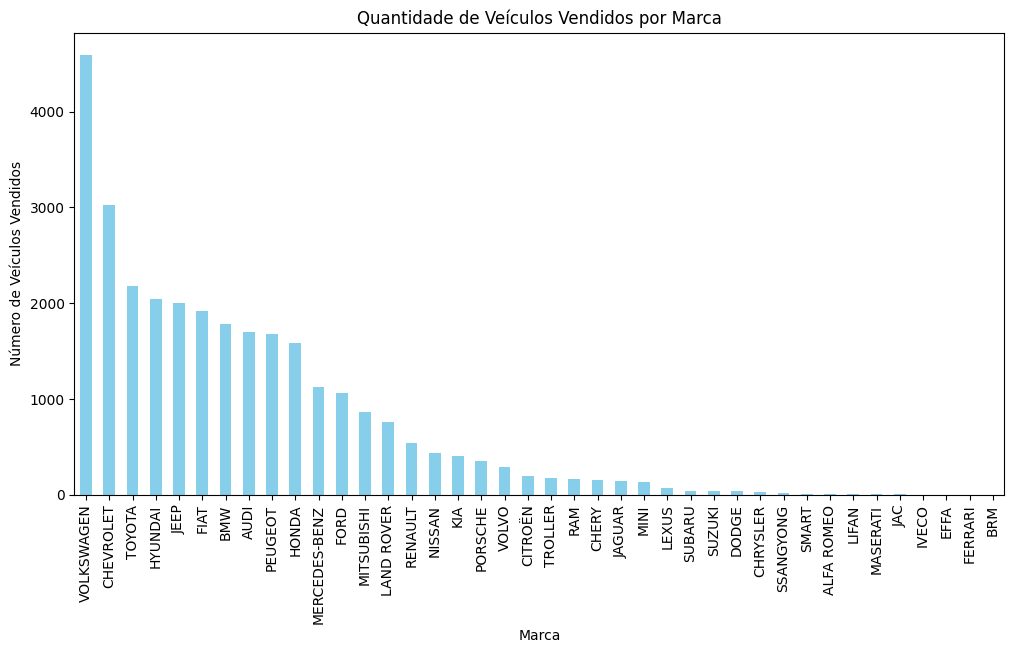

In [31]:
# Agrupando os dados por marca e contando o número de veículos vendidos para cada marca
vendas_por_marca = df_train['marca'].value_counts()

# Gráfico
plt.figure(figsize=(12, 6))
vendas_por_marca.plot(kind='bar', color='skyblue')
plt.xlabel('Marca')
plt.ylabel('Número de Veículos Vendidos')
plt.title('Quantidade de Veículos Vendidos por Marca')
plt.xticks(rotation=90)
plt.savefig('report/eda_qtd_veic_vendidos_Marca.png')
plt.show()

**Análise do Gráfico:** Os gráficos mostram as marcas mais vendidas dentro da nossa base de dados. Podemos observar visualmente que a Volkswagen é a marca mais vendida, seguida pela Chevrolet.


### <a id='4.2.'></a>4.2. Preço

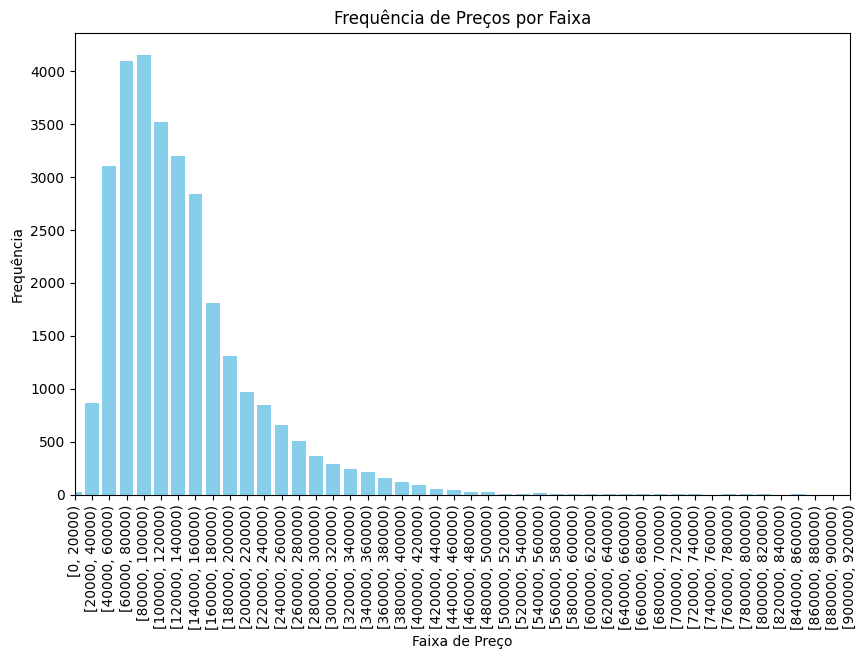

In [32]:
# Arredondando o valor máximo de preço para cima para garantir que todos os dados estejam incluídos
max_preco = int(df_train['preco'].max() + 20000)

# Definindo os intervalos de preços
faixas_de_preco = list(range(0, max_preco, 20000))

# Usando o método cut do pandas para categorizar os preços nos intervalos
df_train['faixa_de_preco'] = pd.cut(df_train['preco'], bins=faixas_de_preco, right=False)

# Calculando a frequência em cada faixa de preço
frequencia_por_faixa = df_train['faixa_de_preco'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(10, 6))
frequencia_por_faixa.plot(kind='bar', width=0.8, color='skyblue')
plt.xlabel('Faixa de Preço')
plt.ylabel('Frequência')
plt.title('Frequência de Preços por Faixa')
plt.xticks(rotation=90)
plt.xlim(0, 45)
plt.savefig('report/eda_Frequencia_Preços_Faixa.png')
plt.show()

**Análise do Gráfico:** Aqui podemos ver a distribuição das vendas de carros por faixa de preço. Esse gráfico nos permite ver qual é a faixa de preço mais procurada pelos consumidores, e também como as vendas variam de acordo com o preço. Com o gráfico, fica fácil notar que a maior concentração de vendas está entre 80 mil e 100 mil, tendo uma queda relevante no número das vendas que ultrapassam esse valor.

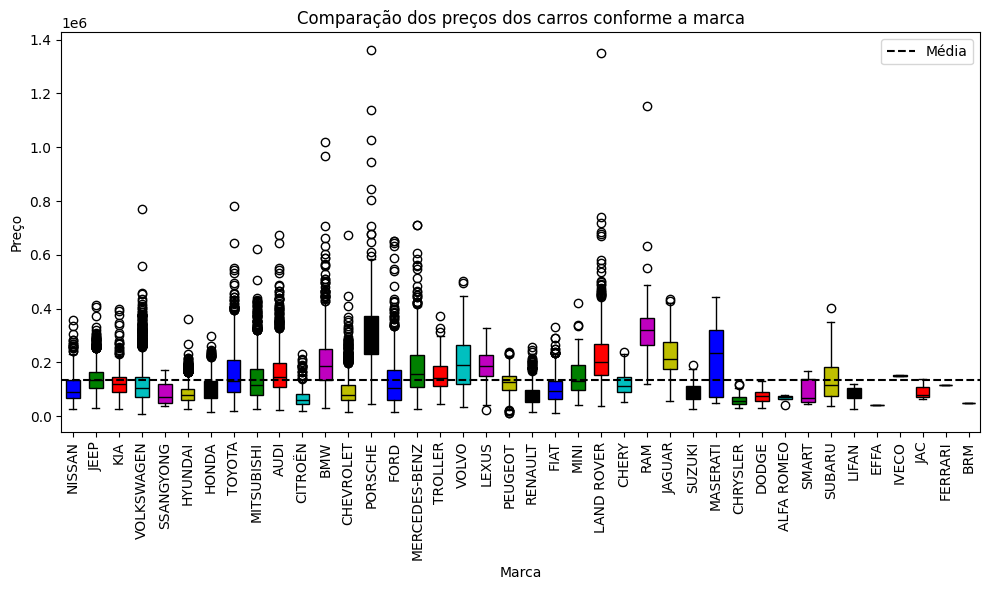

In [33]:
# Dados
marcas_unicas = df_train['marca'].unique()

# Configurarando a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Lista para armazenar os preços de cada marca
precos_por_marca = []

# Cores para as caixas
cores = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Criar um gráfico de caixa para cada marca
for i, marca in enumerate(marcas_unicas):
    preco_por_marca = df_train['preco'][df_train['marca'] == marca]
    precos_por_marca.append(preco_por_marca)
    
    # Plotar o boxplot
    ax.boxplot(preco_por_marca, positions=[i], widths=0.6, patch_artist=True, boxprops=dict(facecolor=cores[i % len(cores)]), medianprops=dict(color='black'), labels=[marca])

# Calculando a média de todas as vendas
media = df_train['preco'].mean()

# Adicionar uma linha para mostrar a média de todas as vendas
ax.axhline(y=media, color='black', linestyle='--', label='Média')

# Configurar rótulos e título
ax.set_xticks(range(len(marcas_unicas)))
ax.set_xticklabels(marcas_unicas, rotation=90)
ax.set_title("Comparação dos preços dos carros conforme a marca")
ax.set_xlabel("Marca")
ax.set_ylabel("Preço")

# Mostrar o gráfico
plt.legend()
plt.tight_layout()
plt.savefig('report/eda_comp_preco_car_conforme_marca.png')
plt.show()

**Análise do Gráfico:** O gráfico possibilita visualizar a variação dos preços conforme a marca, além de identificar quais marcas apresentam valores de venda mais distantes da média, indicada pela linha preta tracejada.

### <a id='4.3.'></a>4.3. Tipo do Carro

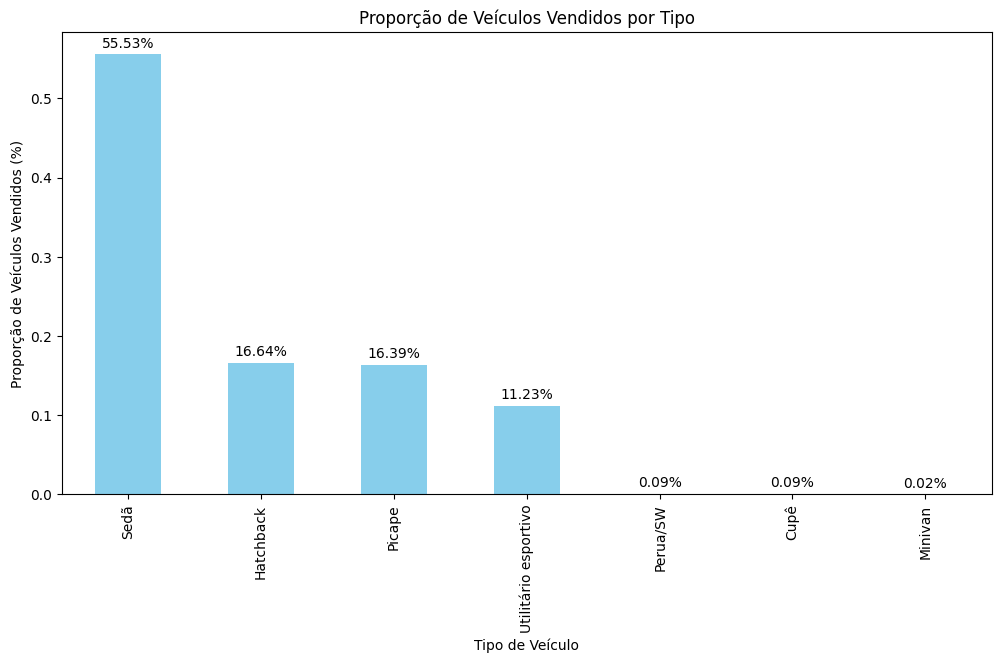

In [34]:
# Calculando a proporção de veículos por tipo
proporcao_por_tipo = df_train['tipo'].value_counts(normalize=True)

# Grpafico
plt.figure(figsize=(12, 6))
proporcao_por_tipo.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Proporção de Veículos Vendidos (%)')
plt.title('Proporção de Veículos Vendidos por Tipo')
plt.xticks(rotation=90)

# Porcentagens
for i, proporcao in enumerate(proporcao_por_tipo):
    plt.text(i, proporcao + 0.005, f'{proporcao:.2%}', ha='center', va='bottom', fontsize=10)

plt.savefig('report/eda_proporcao_veic_vendido_tipo.png')
plt.show()

**Análise do Gráfico:** Esse gráfico nos permite ver qual é o tipo de carro mais popular entre os consumidores, e também como os tipos se distribuem nas vendas. Carros do tipo sedã ocupam mais de 50% dos carros vendidos na nossa base de dados.  Em seguida, temos os carros do tipo hatch, com 16,6%, picape com 16,4%, e utilitário esportivo, com 11,2%. Peruas, minivans e cupês basicamente não aparecem nesse gráfico, com menos de 1% cada. Isso demonstra uma procura maior por carros sedã (seguido de hatch, utilitário esportivo, e picape), que provavelmente são considerados mais versáteis, confortáveis e econômicos. Esse gráfico nos mostra que há uma preferência dos consumidores por certos tipos de carros.

### <a id='4.4.'></a>4.4. Carros por Estado

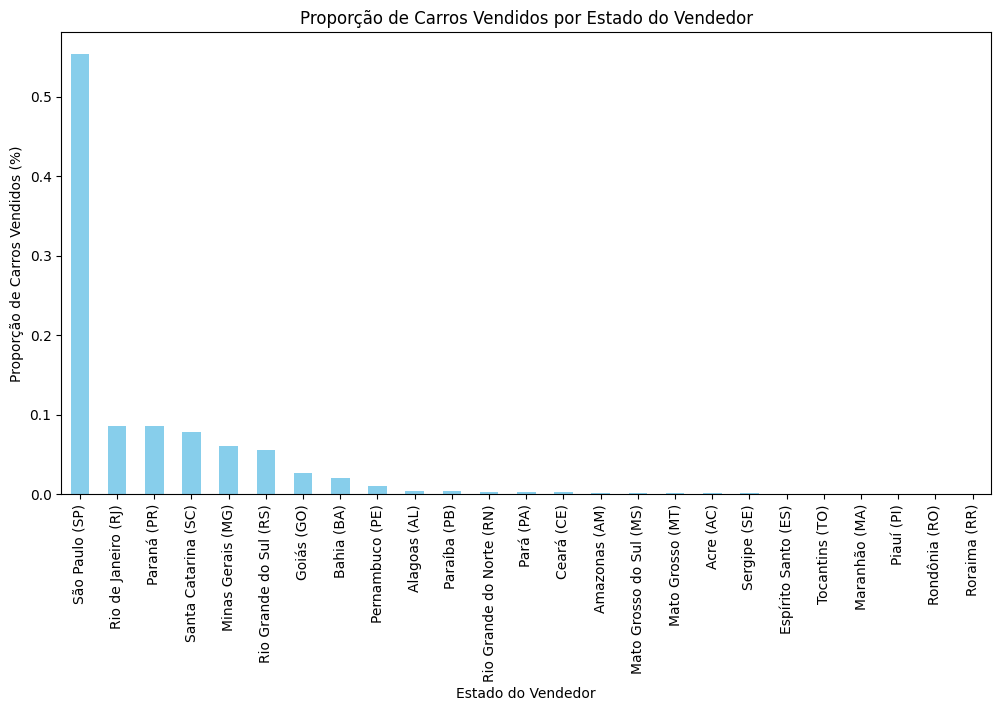

In [35]:
# Calculando a proporção de carros por estado do vendedor
proporcao_por_estado = df_train['estado_vendedor'].value_counts(normalize=True)

# Gráfico
plt.figure(figsize=(12, 6))
proporcao_por_estado.plot(kind='bar', color='skyblue')
plt.xlabel('Estado do Vendedor')
plt.ylabel('Proporção de Carros Vendidos (%)')
plt.title('Proporção de Carros Vendidos por Estado do Vendedor')
plt.xticks(rotation=90)
plt.savefig('report/eda_proporcao_veic_vendido_estado_vendedor.png')
plt.show()

**Análise do Gráfico:** No gráfico podemos facilmente observar a maioria esmagadora de ocorrências de vendas no estado de São Paulo. Iremos utilizar esses dados futuramente para responder perguntas de negócio.

### <a id='4.5.'></a>4.5. Cosiderações Sobre a Análise Descritiva

Analisamos alguns dados sobre as vendas de carros na nossa Base de Dados, usando gráficos para visualizar as informações de forma clara e objetiva. Vimos quais são as marcas mais vendidas, qual é a faixa de preço mais procurada, como o preço varia de acordo com a marca e qual é o tipo de carro mais popular entre os consumidores. Concluímos que a maioria dos consumidores busca carros com preços acessíveis, que as marcas mais vendidas são Volkswagen e Chevrolet, que as marcas mais caras são Porsche e Land Rover, e que o tipo de carro mais popular é o sedã. Esses dados nos permitem entender melhor o comportamento e as preferências dos consumidores, e também identificar oportunidades e desafios para o mercado automobilístico

## <a id='5.'></a>5. Hipóteses de Negócio

### <a id='5.1.'></a>5.1. Hipóteses 1- Carros com blindagem tendem a ter um preço mais alto.

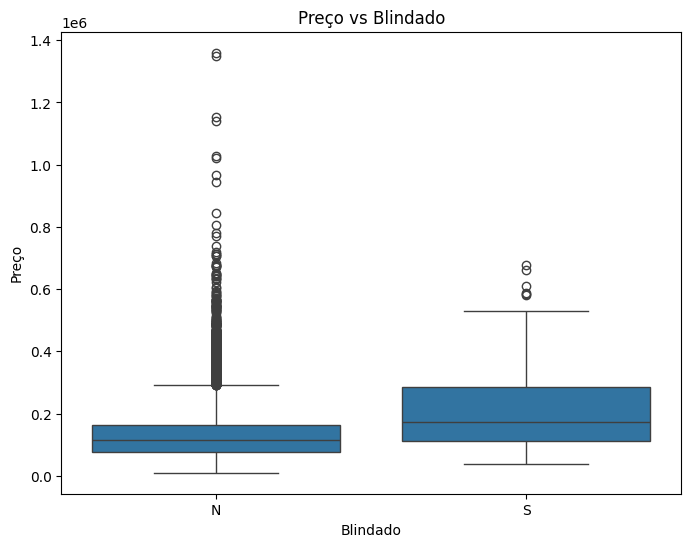

Hipótese 1: Carros com blindagem tendem a ter um preço mais alto. (Análise visual no gráfico)


In [30]:
# Hipótese 1: Carros com blindagem tendem a ter um preço mais alto.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='blindado', y='preco')
plt.title('Preço vs Blindado')
plt.xlabel('Blindado')
plt.ylabel('Preço')
plt.savefig('report/eda_preco_vs_blindado.png')
plt.show()
print("Hipótese 1: Carros com blindagem tendem a ter um preço mais alto. (Análise visual no gráfico)")


Sim, carros com blindagem tendem a ter um preço mais alto, com base na mediana e distribuição geral dos preços mostrados no gráfico. Embora existam exceções (carros não blindados muito caros), a tendência central indica preços mais altos para os blindados.

In [30]:
# Calcular estatísticas descritivas separadas para os grupos blindado (S) e não blindado (N)
df_train.groupby('blindado')['preco'].describe()

,count,mean,std,min,25%,50%,75%,max
blindado,,,,,,,,
N,29336.00,132365.05,80800.07,9869.95,76456.53,114092.83,163063.84,1359812.89
S,248.00,210956.83,131125.66,37388.93,110379.48,171386.18,285730.41,676721.30


|Estatística  |Não Blindado (N)|Blindado (S)|Diferença relevante?|
|-------------|----------------|------------|--------------------|
|Contagem     |29336           |248         |Muito mais carros não blindados no conjunto|
|Média        |132.365         |210.957     |+59% para blindados|
|Mediana      |114.093         |171.386     |Blindados têm mediana bem maior|
|Desvio padrão|80.800          |131.126     |Preços mais variados entre blindados|
|Mínimo       |9.870           |37.389      |Blindados partem de valores mais altos|
|Máximo       |1.359.813       |676.721     |Há mais extremos entre os não blindados|

**Conclusão:**

A análise dos dados revela uma tendência clara de que veículos blindados possuem preços significativamente mais altos em comparação aos veículos não blindados. Com base no gráfico de boxplot e nas estatísticas descritivas, observamos que:

    A mediana dos carros blindados (R$ 171.386) é visivelmente maior que a dos não blindados (R$ 114.093).

    A média de preços dos blindados (R$ 210.957) supera em mais de 50% a média dos não blindados (R$ 132.365), indicando que, em geral, os blindados são mais caros.

    Carros blindados também apresentam uma maior variação de preços, refletida pelo desvio padrão elevado, o que sugere uma gama mais ampla de modelos e níveis de proteção disponíveis nesse segmento.

Apesar de representarem uma pequena fração da amostra total (menos de 1%), os carros blindados demonstram um padrão consistente de valores superiores, mesmo desconsiderando os outliers.

### <a id='5.2.'></a>5.2. Hipóteses 2- Carros mais antigos tendem a ter um hodômetro mais alto.

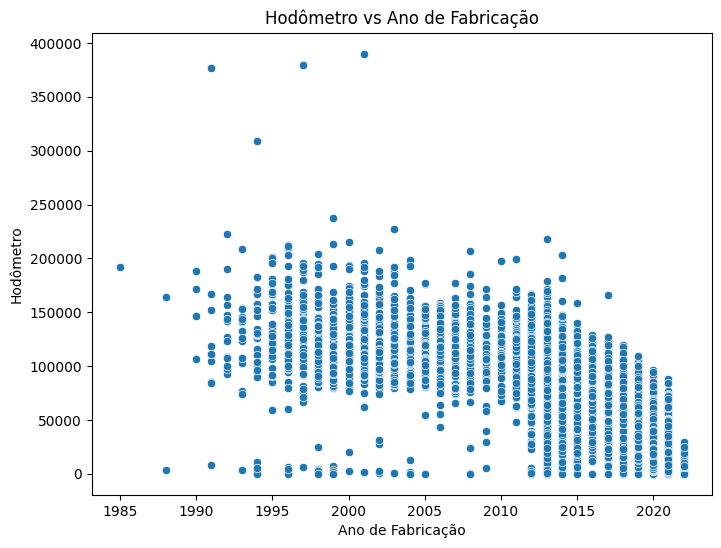

Hipótese 2: Carros mais antigostendem a ter um hodômetro mais alto. (Análise visual no gráfico)


In [37]:
# Hipótese 2: Carros mais antigos tendem a ter um hodômetro mais alto.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='ano_de_fabricacao', y='hodometro')
plt.title('Hodômetro vs Ano de Fabricação')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Hodômetro')
plt.savefig('report/eda_hodometro_vs_ano.png')
plt.show()
print("Hipótese 2: Carros mais antigostendem a ter um hodômetro mais alto. (Análise visual no gráfico)")

### Observações:

**1-Distribuição por ano:**
	Carros fabricados antes de 2005 apresentam uma ampla faixa de quilometragens, muitas acima de 150.000 km, chegando até mais de 300.000 km.
	Carros mais recentes (após 2015) tendem a ter quilometragens mais baixas, com muitos abaixo de 100.000 km.

**2-Tendência inversa ao tempo:**
	À medida que o ano de fabricação se aproxima de 2022, os pontos se concentram mais na parte inferior do gráfico (ou seja, menor quilometragem).
	Isso é esperado, pois veículos mais novos tiveram menos tempo para acumular quilômetros.

**3-Outliers:**
    Existem alguns pontos com baixa quilometragem mesmo em carros antigos, o que pode indicar veículos pouco usados ou com hodômetro zerado após manutenção, ou erros nos dados.

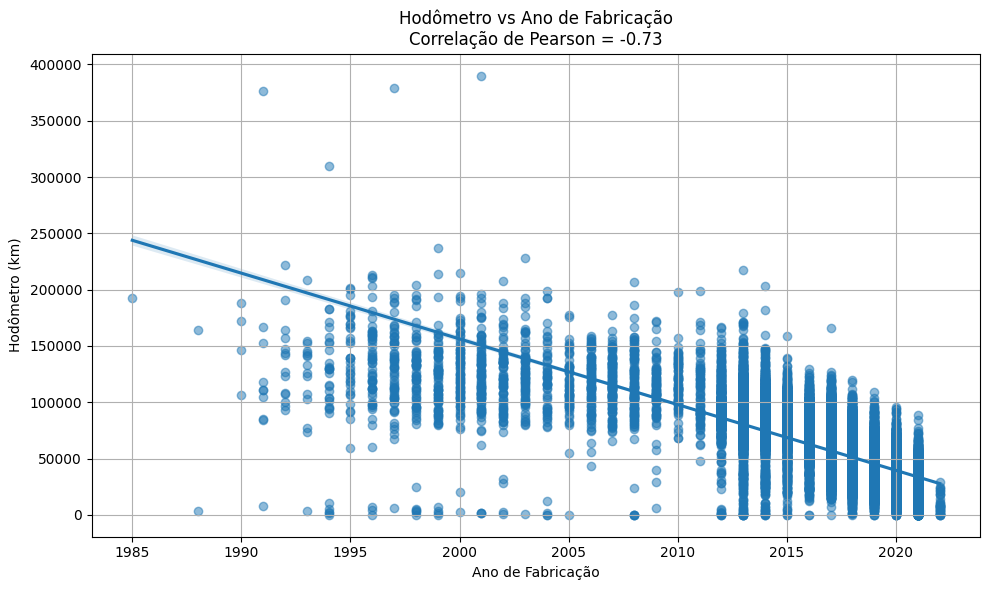

(None, np.float64(-0.7282875422292171), np.float64(0.0))

In [36]:
# Calcular a correlação de Pearson
correlation, p_value = pearsonr(df_train['ano_de_fabricacao'], df_train['hodometro'])

# Gerar gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(data=df_train, x='ano_de_fabricacao', y='hodometro', scatter_kws={'alpha':0.5})
plt.title(f'Hodômetro vs Ano de Fabricação\nCorrelação de Pearson = {correlation:.2f}')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Hodômetro (km)')
plt.grid(True)
plt.tight_layout()
plt.savefig('report/eda_hodometro_vs_ano_Cpearson.png')
plt.show(), correlation, p_value

#### Resultado da Análise
**Correlação de Pearson:** -0.73

**Valor-p:** 0.00 (altamente significativo)

#### Interpretação:
- A correlação é **negativa forte:** à medida que o ano de fabricação aumenta (carros mais novos), o hodômetro tende a diminuir.

- O valor-p indica que essa correlação é estatisticamente significativa.

### Conclusão:

A análise confirma que veículos mais antigos, de fato, apresentam maior quilometragem no hodômetro. Essa tendência faz sentido, já que carros com mais tempo de uso naturalmente percorrem distâncias maiores. Estatisticamente, isso é reforçado por uma correlação negativa forte de -0,73 entre o ano de fabricação e o hodômetro, indicando que quanto mais antigo o carro, maior tende a ser sua quilometragem.

### <a id='5.3.'></a>5.3. Hipóteses 3- O tipo de vendedor (PF vs PJ) influencia no preço médio dos veículos.

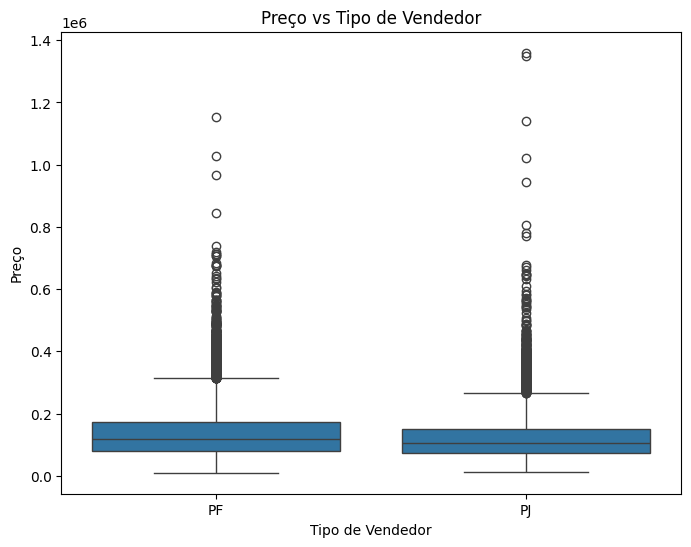

Hipótese 3: O tipo de vendedor (PF vs PJ) influencia no preço médio dos veículos. (Análise visual no gráfico)


In [38]:
# Hipótese 3: O tipo de vendedor (PF vs PJ) influencia no preço médio dos veículos.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='tipo_vendedor', y='preco')
plt.title('Preço vs Tipo de Vendedor')
plt.xlabel('Tipo de Vendedor')
plt.ylabel('Preço')
plt.savefig('report/eda_preco_vs_tipo_vendedor.png')
plt.show()
print("Hipótese 3: O tipo de vendedor (PF vs PJ) influencia no preço médio dos veículos. (Análise visual no gráfico)")

#### Observação:
- As distribuições de preço entre PF e PJ são muito semelhantes.

- A mediana (linha central da caixa) é praticamente igual nos dois grupos.

- Ambos têm uma grande quantidade de outliers (valores extremos), mas esses também estão distribuídos de forma parecida.

- A amplitude interquartílica (distância entre os 25% e 75%) também é próxima.

### Conclusão:

    O tipo de vendedor (PF ou PJ) não apresenta diferença significativa no preço médio dos veículos. Ambos têm distribuição de preços bastante semelhantes.

## <a id='6.'></a>6. Perguntas de Negócio

### <a id='6.1.'></a>6.1. Pergunta 1- Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

No Brasil, o termo "carro popular" refere-se a veículos automotores de entrada, geralmente compactos, com preços acessíveis e projetados para atender às necessidades básicas de transporte da população. Esses carros se destacam por seu baixo custo de aquisição e manutenção, consumo eficiente de combustível e simplicidade em relação a modelos mais luxuosos, sendo ideais para a mobilidade urbana e para quem busca economia sem abrir mão de qualidade essencial.

Antes de analisarmos essa questão, é essencial definirmos com clareza o que caracteriza um carro de marca popular. Para isso, adotaremos critérios específicos, considerando variáveis como marca, faixa de preço, tipo de câmbio e ausência de blindagem.

Com base nesses parâmetros, começaremos segmentando as marcas com maior presença no mercado, ao mesmo tempo em que aplicamos um teto de preço e excluímos características típicas de veículos mais luxuosos, como câmbio automático e blindagem. Somente após essa triagem inicial será possível identificar os modelos que realmente se enquadram na categoria de "populares". A partir dessa classificação, poderemos então mapear os estados onde esses veículos apresentam melhor desempenho em vendas.


Com base na análise do [item 4.2. Preço](#4.2.), observou-se que a maior concentração de vendas está na faixa entre 80 mil e 100 mil. 
Considerando essa informação, o teto de preço para a definição de carros populares será fixado em R$ 100 mil.

In [45]:
# Filtro parâmetros
marcas = df_train['marca'].unique()
filtro_popular = df_train[(df_train['marca'].isin(marcas)) 
                    & (df_train['preco'] <= 100000) 
                    & (df_train['cambio'] == 'Manual')
                    & (df_train['blindado'] == 'N')]

In [46]:
# Calculando a participação de mercado
participacao_mercado = filtro_popular['marca'].value_counts(normalize=True) * 100
marcas_porcentagem = participacao_mercado.sort_values(ascending=False)
marcas_porcentagem

marca
CHEVROLET       23.77
VOLKSWAGEN      20.04
FIAT            19.02
HYUNDAI         14.18
FORD             6.04
RENAULT          5.83
NISSAN           2.85
CITROËN          1.72
PEUGEOT          1.29
HONDA            1.15
TROLLER          0.97
TOYOTA           0.97
MITSUBISHI       0.59
JEEP             0.38
KIA              0.27
DODGE            0.19
SUZUKI           0.19
MERCEDES-BENZ    0.16
AUDI             0.11
LIFAN            0.05
CHERY            0.05
ALFA ROMEO       0.05
EFFA             0.03
JAC              0.03
BRM              0.03
BMW              0.03
VOLVO            0.03
Name: proportion, dtype: float64

In [56]:
print("As seis primeiras marcas tem ",int(marcas_porcentagem.head(6).sum()),"porcento de participação do mercado")

As seis primeiras marcas tem  88 porcento de participação do mercado


A análise de participação de mercado revela uma forte concentração entre as principais montadoras. As seis marcas líderes respondem por 88% do total de vendas, demonstrando um domínio significativo no setor. Mesmo a marca com menor participação entre essas seis ainda detém mais de 5% do mercado, o que reforça sua relevância no cenário nacional e justifica sua inclusão na definição de marcas populares para fins desta análise

In [37]:
print("\n--- Resposta ---")

# Pergunta 1: Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
marcas_populares = [ 'CHEVROLET', 'VOLKSWAGEN', 'FIAT',  'HYUNDAI', 'FORD', 'RENAULT']
df_populares = df_train[df_train['marca'].isin(marcas_populares)]
preco_medio_popular_estado = df_populares.groupby('estado_vendedor')['preco'].mean().sort_values(ascending=False)
melhor_estado_venda_popular = preco_medio_popular_estado.index[0] if not preco_medio_popular_estado.empty else "Nenhum estado encontrado"
preco_melhor_estado_venda_popular = preco_medio_popular_estado.iloc[0] if not preco_medio_popular_estado.empty else "N/A"
print(f"\n1. O melhor estado para vender um carro de marca popular é '{melhor_estado_venda_popular}' com um preço médio de R$ {preco_melhor_estado_venda_popular:.2f}, devido ao maior valor de revenda.")



--- Resposta ---

1. O melhor estado para vender um carro de marca popular é 'Piauí (PI)' com um preço médio de R$ 190915.18, devido ao maior valor de revenda.


### <a id='6.2.'></a>6.2. Pergunta 2-Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

In [38]:
print("\n--- Resposta ---")

# Pergunta 2: Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
df_picape_auto = df_train[(df_train['tipo'] == 'Picape') & (df_train['cambio'] == 'Automática')]
preco_medio_picape_auto_estado = df_picape_auto.groupby('estado_vendedor')['preco'].mean().sort_values(ascending=True)
melhor_estado_compra_picape_auto = preco_medio_picape_auto_estado.index[0] if not preco_medio_picape_auto_estado.empty else "Nenhum estado encontrado"
preco_melhor_estado_compra_picape_auto = preco_medio_picape_auto_estado.iloc[0] if not preco_medio_picape_auto_estado.empty else "N/A"
print(f"\n2. O melhor estado para comprar uma picape com transmissão automática é '{melhor_estado_compra_picape_auto}' com um preço médio de R$ {preco_melhor_estado_compra_picape_auto:.2f}, devido ao menor valor de compra.")


--- Resposta ---

2. O melhor estado para comprar uma picape com transmissão automática é 'Paraíba (PB)' com um preço médio de R$ 93157.04, devido ao menor valor de compra.


### <a id='6.3.'></a>6.3. Pergunta 3- Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

In [39]:
print("\n--- Resposta ---")

# Pergunta 3: Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?
df_garantia = df_train[df_train['garantia_de_fábrica'] == 'Garantia de fábrica']
preco_medio_garantia_estado = df_garantia.groupby('estado_vendedor')['preco'].mean().sort_values(ascending=True)
melhor_estado_compra_garantia = preco_medio_garantia_estado.index[0] if not preco_medio_garantia_estado.empty else "Nenhum estado encontrado"
preco_melhor_estado_compra_garantia = preco_medio_garantia_estado.iloc[0] if not preco_medio_garantia_estado.empty else "N/A"
print(f"\n3. O melhor estado para comprar carros com garantia de fábrica é '{melhor_estado_compra_garantia}' com um preço médio de R$ {preco_melhor_estado_compra_garantia:.2f}, devido ao menor valor de compra.")


--- Resposta ---

3. O melhor estado para comprar carros com garantia de fábrica é 'Paraíba (PB)' com um preço médio de R$ 95762.75, devido ao menor valor de compra.


## <a id='7.'></a>7. Próximo passos

A Fase 1 do desafio foi concluída com sucesso. Realizamos a análise descritiva e, por meio da análise exploratória, conseguimos responder às nossas hipóteses e questões de negócio. Agora, estamos prontos para avançar para a próxima etapa, onde desenvolveremos nosso modelo preditivo no notebook intitulado modelagem.ipynb.